# Magic Methods

Below you'll find the same code from the previous exercise except two more methods have been added: an __add__ method and a __repr__ method. Your task is to fill out the code and get all of the unit tests to pass. You'll find the code cell with the unit tests at the bottom of this Jupyter notebook.

As in previous exercises, there is an answer key that you can look at if you get stuck. Click on the "Jupyter" icon at the top of this notebook, and open the folder 4.OOP_code_magic_methods. You'll find the answer.py file inside the folder.

TypeError: title() missing 1 required positional argument: 's'

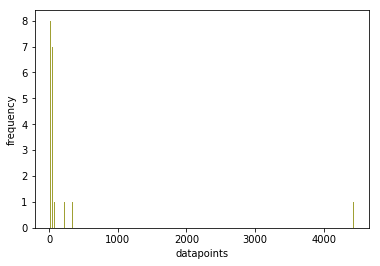

In [38]:
import math
import matplotlib.pyplot as plt
import statistics
import matplotlib
from scipy.stats import norm
import seaborn as sns


class Gaussian():
    """ Gaussian distribution class for calculating and 
    visualizing a Gaussian distribution.
    
    Attributes:
        mean (float) representing the mean value of the distribution
        stdev (float) representing the standard deviation of the distribution
        data_list (list of floats) a list of floats extracted from the data file
            
    """
    def __init__(self, mu = 0, sigma = 1):
        
        self.mean = mu
        self.stdev = sigma
        self.data = []

        
    def calculate_mean(self):
    
        """Method to calculate the mean of the data set.
        
        Args: 
            None
        
        Returns: 
            float: mean of the data set
    
        """
        
        #TODO: Calculate the mean of the data set. Remember that the data set is stored in self.data
        # Change the value of the mean attribute to be the mean of the data set
        # Return the mean of the data set      
        
        self.mean = sum(self.data)/len(self.data)
        return self.mean

    
    def calculate_stdev(self, sample=True):

        """Method to calculate the standard deviation of the data set.
        
        Args: 
            sample (bool): whether the data represents a sample or population
        
        Returns: 
            float: standard deviation of the data set
    
        """

        # TODO:
        #   Calculate the standard deviation of the data set
        #   
        #   The sample variable determines if the data set contains a sample or a population
        #   If sample = True, this means the data is a sample. 
        #   Keep the value of sample in mind for calculating the standard deviation
        #   Make sure to update self.stdev and return the standard deviation as well
        self.stdev = statistics.stdev(self.data)
        return self.stdev
        

    def read_data_file(self, file_name, sample=True):
    
        """Method to read in data from a txt file. The txt file should have
        one number (float) per line. The numbers are stored in the data attribute. 
        After reading in the file, the mean and standard deviation are calculated
                
        Args:
            file_name (string): name of a file to read from
        
        Returns:
            None
        
        """
        
        # This code opens a data file and appends the data to a list called data_list
        with open(file_name) as file:
            data_list = []
            line = file.readline()
            while line:
                data_list.append(int(line))
                line = file.readline()
        file.close()
    
        # TODO: 
        #   Update the self.data attribute with the data_list
        #   Update self.mean with the mean of the data_list. 
        #       You can use the calculate_mean() method with self.calculate_mean()
        #   Update self.stdev with the standard deviation of the data_list. Use the 
        #       calculate_stdev() method.
        self.mean = self.calculate_mean(data_list)
        self.stdev = self.calculate_stdev(data_list)
        return self
        
        
    def plot_histogram(self):
        """Method to output a histogram of the instance variable data using 
        matplotlib pyplot library.
        
        Args:
            None
            
        Returns:
            None
        """
        
        # TODO: Plot a histogram of the data_list using the matplotlib package.
        #       Be sure to label the x and y axes and also give the chart a title
        plt.hist(self.data, histtype='bar', align='mid', bins = 'auto', orientation='vertical', rwidth=0.5, color= '#A0A034')
        plt.xlabel("datapoints")
        plt.ylabel("frequency")
        plt.title(label= "Random", loc='center')
        plt.show()
        
        
    def pdf(self, x):
        """Probability density function calculator for the gaussian distribution.
        
        Args:
            x (float): point for calculating the probability density function
            
        Returns:
            float: probability density function output
        """
        
        # TODO: Calculate the probability density function of the Gaussian distribution
        #       at the value x. You'll need to use self.stdev and self.mean to do the calculation
        data_normal = norm.rvs(size=10000,loc=0,scale=1)
        ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
        ax.set(xlabel='Normal Distribution', ylabel='Frequency')
        
        

    def plot_histogram_pdf(self, n_spaces = 50):

        """Method to plot the normalized histogram of the data and a plot of the 
        probability density function along the same range
        
        Args:
            n_spaces (int): number of data points 
        
        Returns:
            list: x values for the pdf plot
            list: y values for the pdf plot
            
        """
        
        #TODO: Nothing to do for this method. Try it out and see how it works.
        
        mu = self.mean
        sigma = self.stdev

        min_range = min(self.data)
        max_range = max(self.data)
        
         # calculates the interval between x values
        interval = 1.0 * (max_range - min_range) / n_spaces

        x = []
        y = []
        
        # calculate the x values to visualize
        for i in range(n_spaces):
            tmp = min_range + interval*i
            x.append(tmp)
            y.append(self.pdf(tmp))

        # make the plots
        fig, axes = plt.subplots(2,sharex=True)
        fig.subplots_adjust(hspace=.5)
        axes[0].hist(self.data, density=True)
        axes[0].set_title('Normed Histogram of Data')
        axes[0].set_ylabel('Density')

        axes[1].plot(x, y)
        axes[1].set_title('Normal Distribution for \n Sample Mean and Sample Standard Deviation')
        axes[0].set_ylabel('Density')
        plt.show()

        return x, y

    def __add__(self, other):
        
        """Magic method to add together two Gaussian distributions
        
        Args:
            other (Gaussian): Gaussian instance
            
        Returns:
            Gaussian: Gaussian distribution
            
        """
        
        # TODO: Calculate the results of summing two Gaussian distributions
        #   When summing two Gaussian distributions, the mean value is the sum
        #       of the means of each Gaussian.
        #
        #   When summing two Gaussian distributions, the standard deviation is the
        #       square root of the sum of square ie sqrt(stdev_one ^ 2 + stdev_two ^ 2)
        
        # create a new Gaussian object
        result = Gaussian()
        
        # TODO: calculate the mean and standard deviation of the sum of two Gaussians
        result.mean = 5 # change this line to calculate the mean of the sum of two Gaussian distributions
        result.stdev = 2 # change this line to calculate the standard deviation of the sum of two Gaussian distributions
        
        return result

    def __repr__(self):
    
        """Magic method to output the characteristics of the Gaussian instance
        
        Args:
            None
        
        Returns:
            string: characteristics of the Gaussian
        
        """
        
        # TODO: Return a string in the following format - 
        # "mean mean_value, standard deviation standard_deviation_value"
        # where mean_value is the mean of the Gaussian distribution
        # and standard_deviation_value is the standard deviation of
        # the Gaussian.
        # For example "mean 3.5, standard deviation 1.3"
        
        pass

fuck = Gaussian()
fuck.data = [23,35,4452,345,2,46,7,45,233,64,7,45,2,2,34,26,46,7,34]
Gaussian.plot_histogram(fuck)

In [15]:
# Unit tests to check your solution

import unittest

class TestGaussianClass(unittest.TestCase):
    def setUp(self):
        self.gaussian = Gaussian(25, 2)

    def test_initialization(self): 
        self.assertEqual(self.gaussian.mean, 25, 'incorrect mean')
        self.assertEqual(self.gaussian.stdev, 2, 'incorrect standard deviation')

    def test_pdf(self):
        self.assertEqual(round(self.gaussian.pdf(25), 5), 0.19947,\
         'pdf function does not give expected result') 

    def test_meancalculation(self):
        self.gaussian.read_data_file('numbers.txt', True)
        self.assertEqual(self.gaussian.calculate_mean(),\
         sum(self.gaussian.data) / float(len(self.gaussian.data)), 'calculated mean not as expected')

    def test_stdevcalculation(self):
        self.gaussian.read_data_file('numbers.txt', True)
        self.assertEqual(round(self.gaussian.stdev, 2), 92.87, 'sample standard deviation incorrect')
        self.gaussian.read_data_file('numbers.txt', False)
        self.assertEqual(round(self.gaussian.stdev, 2), 88.55, 'population standard deviation incorrect')

    def test_add(self):
        gaussian_one = Gaussian(25, 3)
        gaussian_two = Gaussian(30, 4)
        gaussian_sum = gaussian_one + gaussian_two
        
        self.assertEqual(gaussian_sum.mean, 55)
        self.assertEqual(gaussian_sum.stdev, 5)

    def test_repr(self):
        gaussian_one = Gaussian(25, 3)
        
        self.assertEqual(str(gaussian_one), "mean 25, standard deviation 3")
        
tests = TestGaussianClass()

tests_loaded = unittest.TestLoader().loadTestsFromModule(tests)

unittest.TextTestRunner().run(tests_loaded)

F.EEEF
ERROR: test_meancalculation (__main__.TestGaussianClass)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-15-09732a143793>", line 18, in test_meancalculation
    self.assertEqual(self.gaussian.calculate_mean(),         sum(self.gaussian.data) / float(len(self.gaussian.data)), 'calculated mean not as expected')
  File "<ipython-input-11-1a25813a2e4e>", line 38, in calculate_mean
    self.mean = sum(self.data)/len(self.data)
ZeroDivisionError: division by zero

ERROR: test_pdf (__main__.TestGaussianClass)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-15-09732a143793>", line 14, in test_pdf
    self.assertEqual(round(self.gaussian.pdf(25), 5), 0.19947,         'pdf function does not give expected result')
TypeError: type NoneType doesn't define __round__ method

ERROR: test_repr (__main__.TestGaussianClass)
--------------

<unittest.runner.TextTestResult run=6 errors=3 failures=2>